# Démarche de travail
## Définir un objectif de mesurable
- Objectif : Prédire si oui ou non nous pouvons investir notre argent en fonction des données des jours précédents
- Métrique : 
    - Précision (Permet de réduire au maximum le taux de faux Faux Positifs) : 60%
    - Recall / Sensibilité (Permet de réduire au maximum le taux de Faux Négatifs) : 60%
    - Score F1 (Rapport de précision et de recall) : 50%



## EDA (Exploratory Data Analysis) (Analyse et exploration des données)

**Objectif** : Comprendre au maximum les données dont on dispose pour définir ne stratéfie de modélisation

#### **Checklist de base (non-exhaustive)**
##### Analyse de la forme :
- **Identification de la target** : 
    - * Close | Buy, Sell (T1) | position (T2) 
- **Nombre de lignes et de colonnes** : 
    - * 3037, 6
- T**ypes de variables** : 
    - * Qualitatives : 6
- **Identification des valeurs manquantes** : 
    - * Il n'y a qu'une seule ligne de valeurs manquantes ce qui me laisse avec une grande quantité de données à exploiter

##### Analyse du fond :
- **Visualisation de la target** (**Histogramme / Boxplot**) : 
    - * Je constate que Close présente une forte variance de données (151.15 à 58305.03) ce qui me faudra donc de devoir normaliser mes données
- **Compréhension des différentes variables** (**Internet**) :
    - * Open représente le montant à l'ouverture du marché du trading dans la journée pour le Bitcoin
    - * Close représente le montant à la fermeture du marché du trading dans la journée pour le Bitcoin
    - * High représente le montant le plus élevé atteint à la fermeture du marché du trading dans la journée pour le Bitcoin
    - * Low représente le montant le plus bas atteint à la fermeture du marché du trading dans la journée pour le Bitcoin
- **Visualisation des relations features-target** (**Histogramme / Boxplot**) :
    - * Je remarque que toutes mes variables ont une répartition entre 100 et 70000 (Low 60000) avec une forme asymétrique
- **Identification des outliers** :
    - * On peux considérer que les valeurs allant de 40000 à 60000, qui représentent des période de forte intérêt et sont donc assez uniques, sont des outliers mais comme le monde de la bourse et plus particulièrement le bitcoin sont très volatiles les outiliers d'hiers peuvent devenir la norme d'aujourd'hui. Donc je ne les considère pas comme tel.
- **Conclusion initial** :
    - * Je constate que Low, High et Open sont vraiment très très proches de Close. A tel point qu'ils suivent exactement la même courbe d'évolution que Close, que l'échelle des valeurs est la même et peuvent donc potentiellement être utilisés afin de mettre en place un modèle de machine learning d'apprentissage profond pour prédire la courbe d'évolution du bitcoin.

##### Analyse plus détaillé :
Je souhaite ici vérifier la faisabilité d'une prédiction selon les valeurs définies par mes différentes variables en utilisant la Turtle Strategy
- **Turtle Strategy (T1)** :
    - * Terriblement inefficace : Cependant les colonnes Buy, Sell peuvent être fusionnés afin d'avoir une colonne exploitable par un modèle

- **Turtle Strategy (T2)** :
    - * Terriblement inefficace : Cependant la colonne position peut être exploité à des fins de prédictions par un modèle de Deep Learning


## Pre-processing (Pré-traitement des données - Vidéo 22/30)

**Objectif** : Transformer la data pour le mettre dans un format propice au Machine Learning 

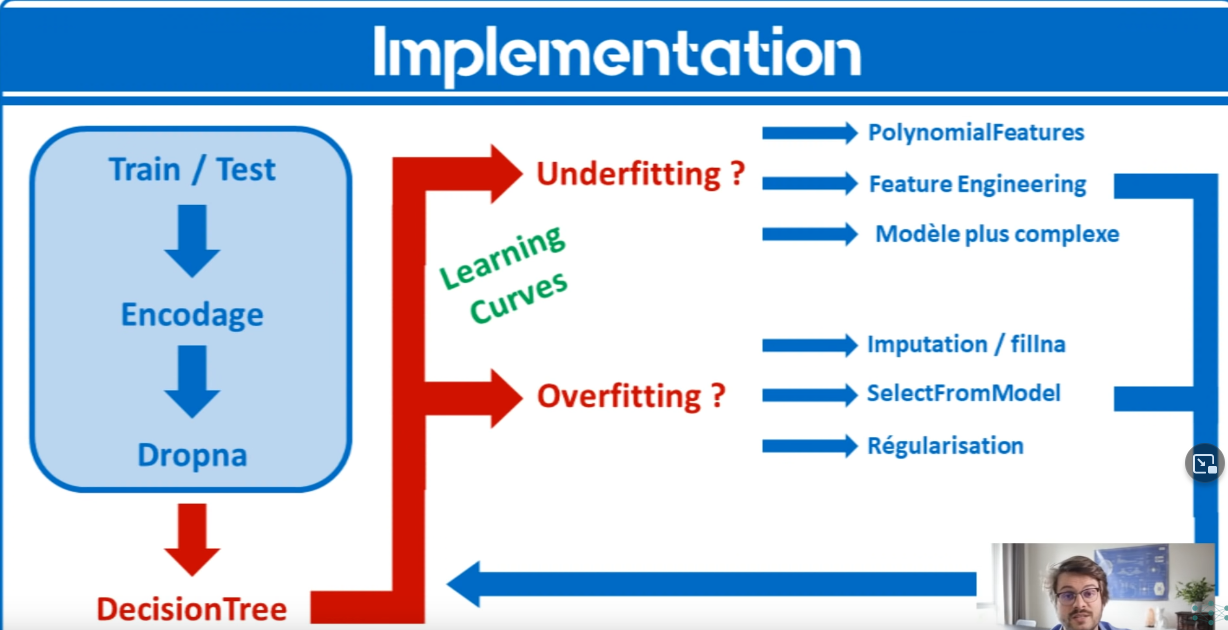
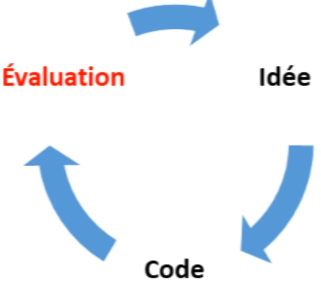

#### **Checklist de base (non-exhaustive) (Recommandé de ne faire que sa pour le Pre-processing)**
- Création du Train set / Test Set :
- Elimination des NaN : dropna(), imputation, colonnes "vides"
- Encodage
- **===> Premier modèle : Evaluation - Diagnostique**


#### **Améliorer la performance du modèle (A ne pas faire dans l'immédiat)**
- Suppression des outliers néfastes au modèle (Valeurs abérantes)
- Feature Selection
- Feature Engineering
- Feature Scaling
- (Feature Extraction) (Extraire certaines caractéristiques)
- (Normalisation)

## Modeling (Mise en place du modèle)

**Objectif** : Développer un modèle de machine learning qui réponde à l'objectif final

#### **Checklist de base (non-exhaustive)**

- Définir une fonction d'évaluation
- Entrainement de différents modèles
- Optimisation avec GridSearchCV
- (Optionnel) Analyse des erreurs et retour au Preprocessing / EDA
- Learning Curve et price de décision

# EDA (Exploratory Data Analysis) (Analyse et exploration des données)

## Dépendances

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:

# * Je peux définir combien de row peuvent apparaîtres lors du print
# ? pd.set_option('display.max_row', 100)
# ? pd.set_option('display.max_column', 100)

In [3]:
data = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625.0


## Analyse de la forme des données

In [5]:

# * Je fais une copie du dataframe afin de pouvoir le réutiliser plus tard si besoin
df = data.copy()


In [6]:

# * Nombre de ligne et de colone initial
df.shape

(3037, 6)

In [7]:

# Déterminer les types de variables dans le dataset
# ? df.dtypes

# * Compter le nombre d'apparition de chaque type de variable
df.dtypes.value_counts()

# Montrer le nombre de variable dans un graphique
# ? df.dtypes.value_counts().plot.pie()

float64    6
dtype: int64

In [8]:

# * Je souhaite voir si il y a des valeurs manquantes dans mon dataset m'éthode 1
df.isna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,False,False,False,False,False,False
2014-09-18,False,False,False,False,False,False
2014-09-19,False,False,False,False,False,False
2014-09-20,False,False,False,False,False,False
2014-09-21,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-01-05,False,False,False,False,False,False
2023-01-06,False,False,False,False,False,False
2023-01-07,False,False,False,False,False,False


<AxesSubplot: ylabel='Date'>

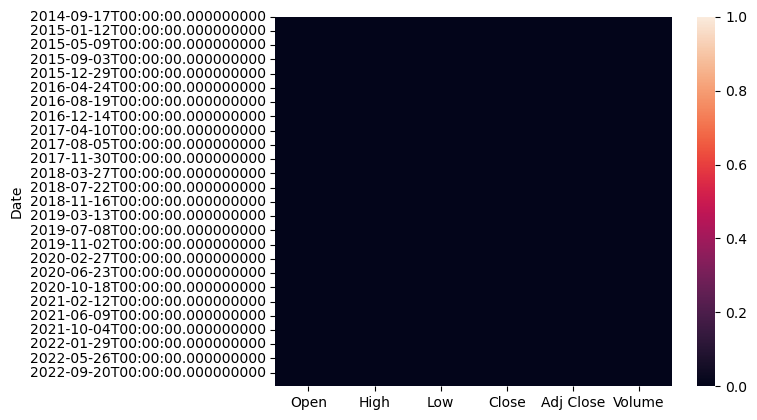

In [9]:

# * Je souhaite voir si il y a des valeurs manquantes dans mon dataset (m'éthode 1)
# * J'affiche une heatmap de mon dataset afin de visuellement évaluer si j'ai des valeurs innexistantes 
# * A vue do'eil je constate que non. Ce qui signifie qu'il y a potentièllement très très peux de données manquantes
# ? sns.heatmap(df.isna(), cbar=False)
sns.heatmap(df.isna())

In [10]:

# * Je souhaite voir si il y a des valeurs manquantes dans mon dataset (m'éthode 2)
# * Je constate que j'ai potentiellement une seule colonne manquante dans tout mon dataset
df.isna().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [11]:

# * Je souhaite voir si il y a des valeurs manquantes dans mon dataset (m'éthode 3)
# * Je divise par le nombre de ligne dans le dataset pour obtenir un pourcentage de valeurs manquantes
# ? (df.isna().sum() / df.shape[0]).sort_values(ascending=True)
df.isna().sum() / df.shape[0]

Open         0.000329
High         0.000329
Low          0.000329
Close        0.000329
Adj Close    0.000329
Volume       0.000329
dtype: float64

In [12]:

# * Je constate que je ne risque pas de perdre en précision en supprimant les données manquantes
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,1.638917e+07
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,2.669185e+07
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,2.956010e+07
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,2.873683e+07
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,2.070262e+07
...,...,...,...,...,...,...
2023-01-04,15817.671875,16002.794922,15783.755859,15899.841797,15899.841797,1.736931e+10
2023-01-05,15900.061523,15902.215820,15902.749023,16002.543945,16002.543945,1.301434e+10
2023-01-06,16002.293945,15960.681641,15921.389648,15896.708984,15896.708984,1.351641e+10


<AxesSubplot: ylabel='Date'>

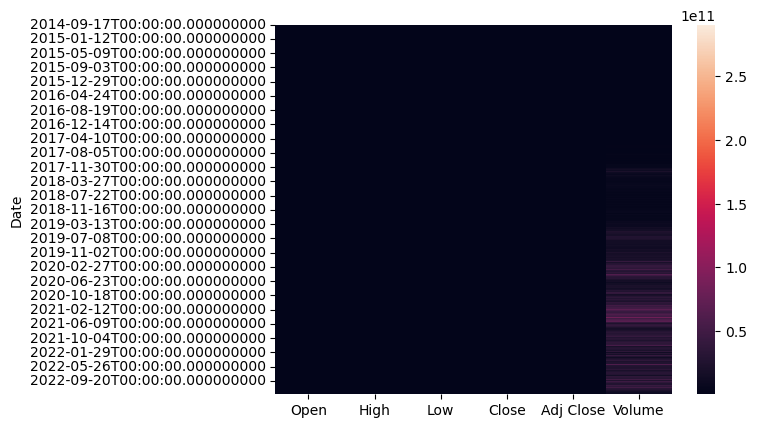

In [13]:

# TODO Je constate ici que le volume a une variation assez étrange à mesure qu'on avance dans le temps. Pourquoi ?
sns.heatmap(df)

,Close,Volume
Date,,
2014-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2015-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2016-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2017-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2018-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2019-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2020-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2021-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2022-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"


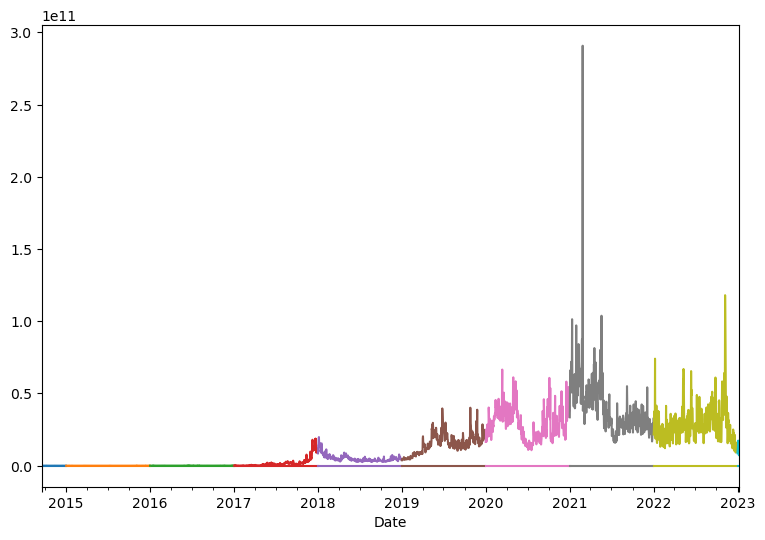

In [14]:

# * Je dois vérifier si le volume aurait un quelquonc lien avec Close
# * Une première visualisation démontre que le Volume présente des valeurs abérante par rapport à Close.
df[['Close', 'Volume']].resample('Y').plot(figsize=(9,6))

Date
2014-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2015-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2016-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2017-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2018-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2019-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2020-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2021-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2022-12-31    [AxesSubplot(0.125,0.53;0.775x0.35), AxesSubpl...
2023-12-31    [AxesSubplot(0.125,0.570909;0.775x0.309091), A...
Freq: A-DEC, dtype: object

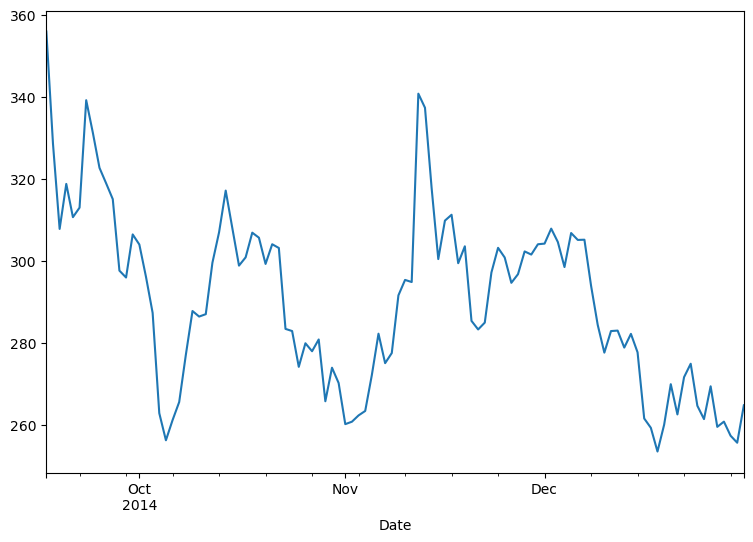

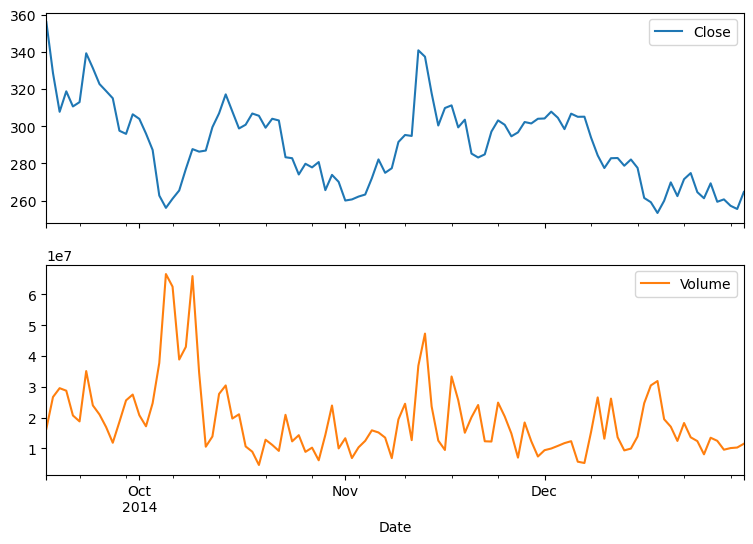

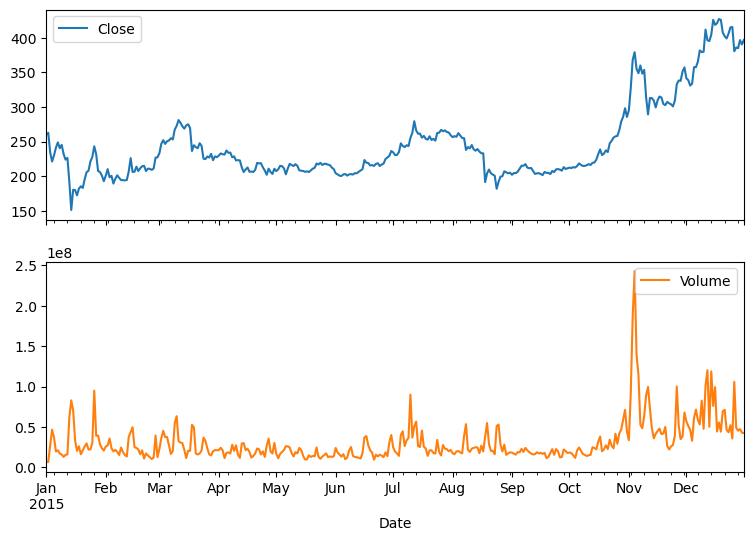

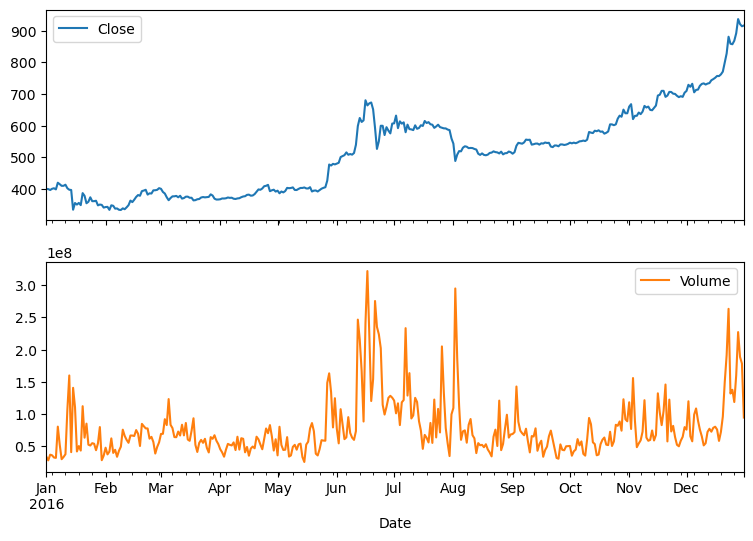

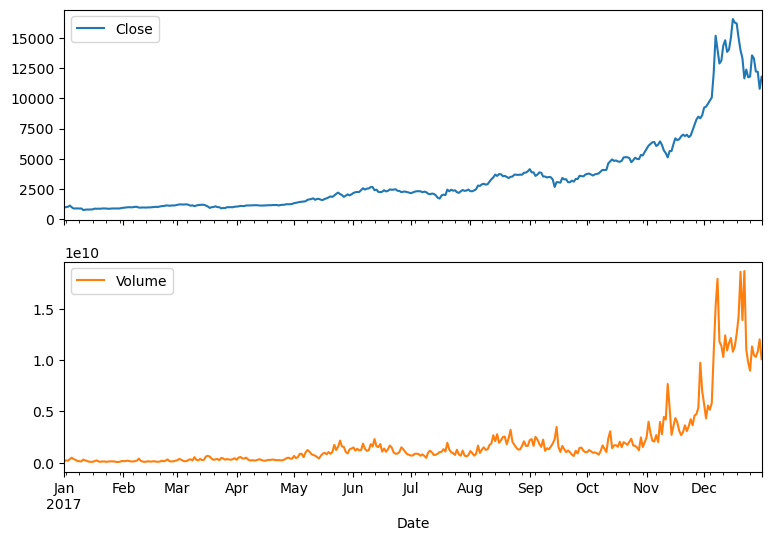

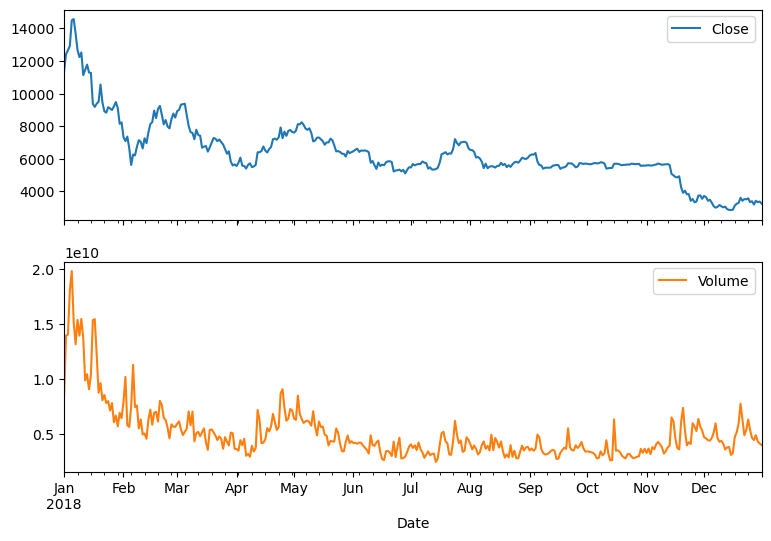

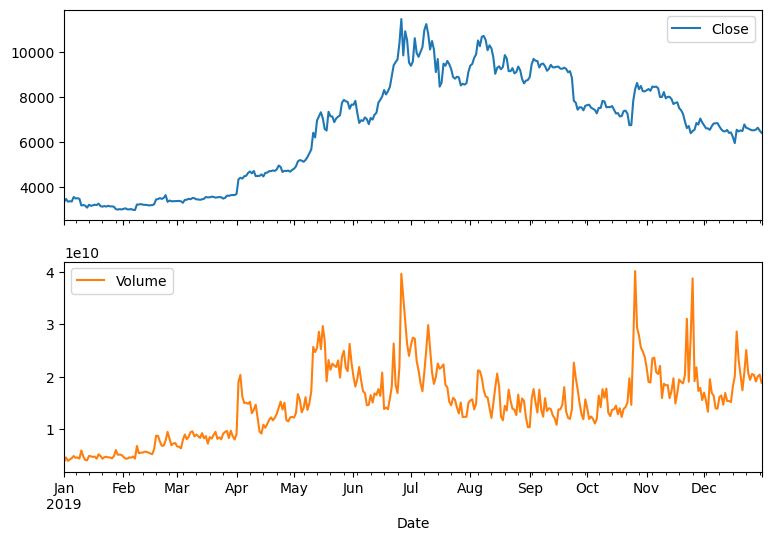

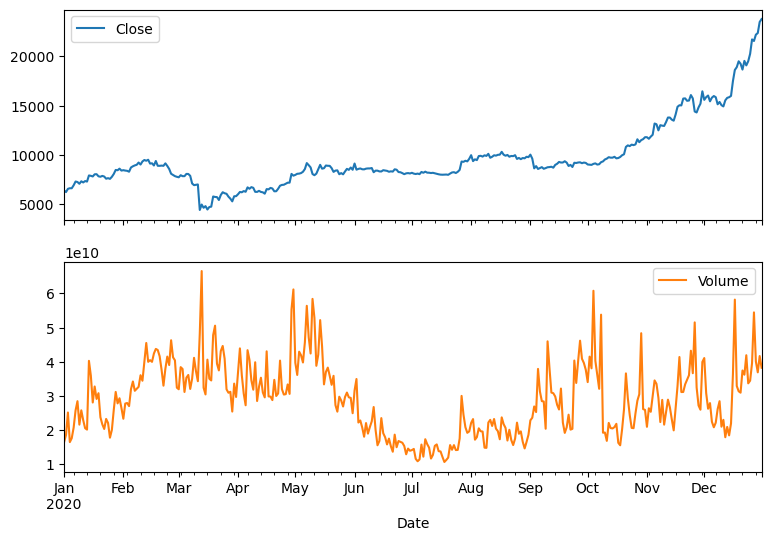

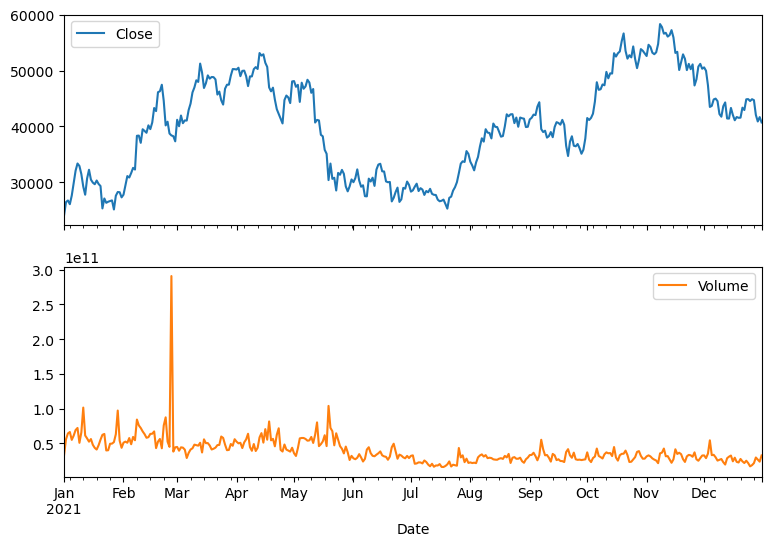

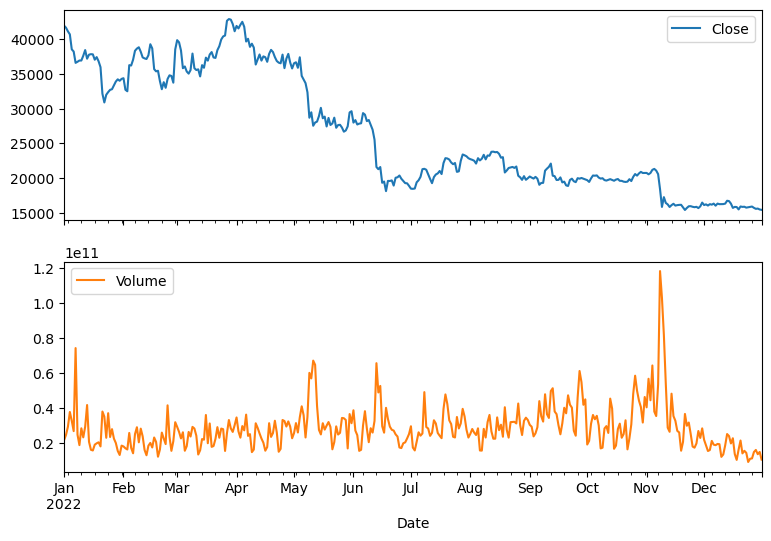

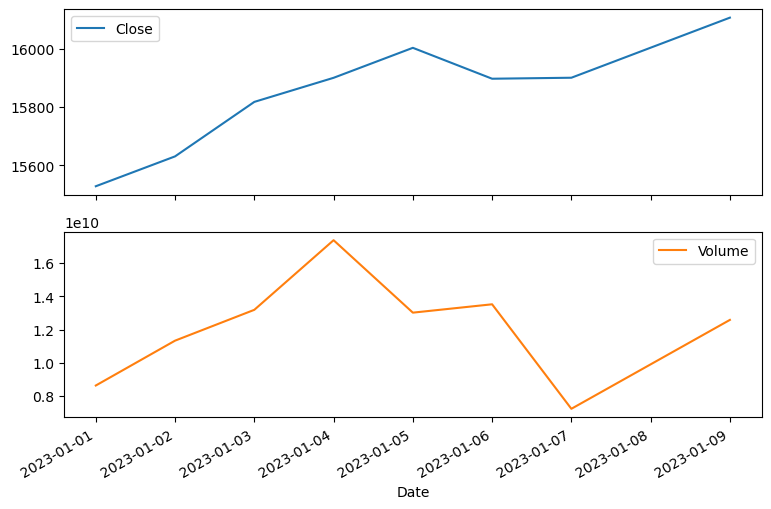

In [15]:

# * Je constate que le taux de grabuge dans dans le volume est assez élevé mais présente une courbe à peux prêt similaire au Close.
# * Ce qui représente une piste potentiel dans cet étude mais il reste cependant assez volatile et peux être trompeur sur le long terme.
# * Voir 2020
df[['Close', 'Volume']].resample('Y').plot(subplots=True, figsize=(9,6))

In [16]:

# * Comme le volume présente des valeurs trop élevé pour l'étude, je décide cependant de m'en séparer pour la suite.
df = df.drop('Volume', axis=1)

In [17]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446
...,...,...,...,...,...
2023-01-04,15817.671875,16002.794922,15783.755859,15899.841797,15899.841797
2023-01-05,15900.061523,15902.215820,15902.749023,16002.543945,16002.543945
2023-01-06,16002.293945,15960.681641,15921.389648,15896.708984,15896.708984


,Close,Adj Close
Date,,
2014-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2015-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2016-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2017-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2018-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2019-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2020-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2021-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"
2022-12-31,"AxesSubplot(0.125,0.11;0.775x0.77)","AxesSubplot(0.125,0.11;0.775x0.77)"


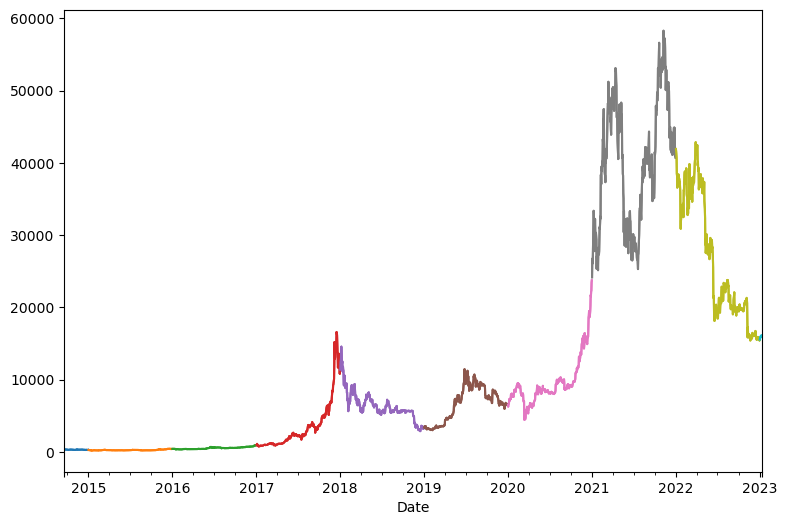

In [18]:

#  * Adj Close me semble assez similaire à Close, dans le doute je décide donc de vérifier les possibles différences entre les 2
df[['Close', 'Adj Close']].resample('Y').plot(figsize=(9,6))

In [19]:

# * Adj Close présente les mêmes courbes de croissance et de décroissance que Close.
# * Comme cela ne m'apporte pas d'informations supplémentaires, je décide de le retirer également.
df = df.drop('Adj Close', axis=1)

In [20]:

# * A ce stade :
# * Open représente le montant à l'ouverture du marché du trading dans la journée pour le Bitcoin
# * Close représente le montant à la fermeture du marché du trading dans la journée pour le Bitcoin
# * High représente le montant le plus élevé atteint à la fermeture du marché du trading dans la journée pour le Bitcoin
# * Low représente le montant le plus bas atteint à la fermeture du marché du trading dans la journée pour le Bitcoin
# * Ces valeurs sont utiles donc je décide de les garder.
df

,Open,High,Low,Close
Date,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367
2014-09-18,355.588409,355.505402,319.789459,328.539368
2014-09-19,328.278503,330.936707,298.921021,307.761139
2014-09-20,307.665253,329.978180,303.931244,318.758972
2014-09-21,318.120514,321.504517,306.502197,310.632446
...,...,...,...,...
2023-01-04,15817.671875,16002.794922,15783.755859,15899.841797
2023-01-05,15900.061523,15902.215820,15902.749023,16002.543945
2023-01-06,16002.293945,15960.681641,15921.389648,15896.708984


## Examen de la colonne target

In [21]:
df["Close"].max()

58305.039063

In [22]:
df["Close"].min()

151.152512

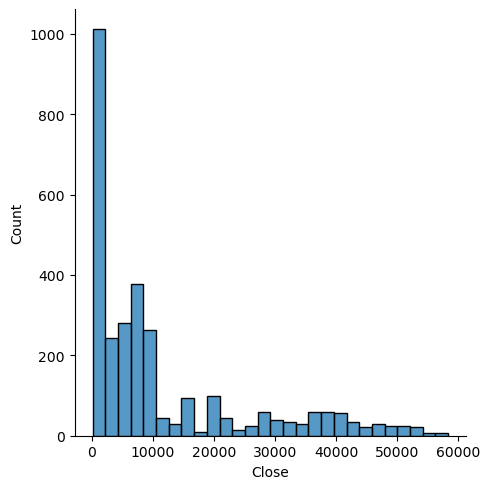

In [23]:

# * Je cherche à savoir quel est l'échel des valeurs
sns.displot(df['Close'])

c:\Users\fredd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Close', ylabel='Density'>

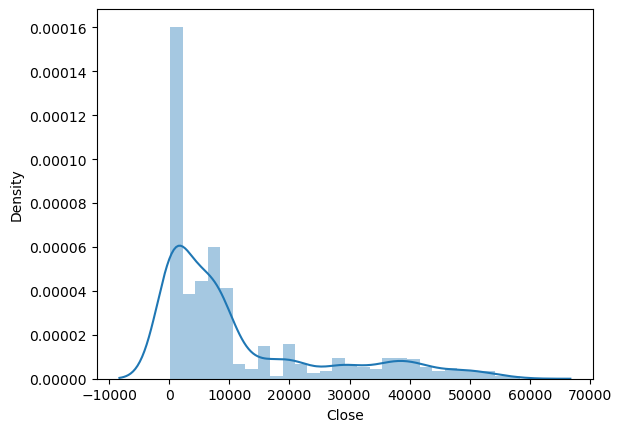

In [24]:

# * Je constate que je vais avoir besoin de normaliser mes données
sns.distplot(df['Close'])

## Histogrammes des variables continues / Visualisation des relations features-target (**Histogramme / Boxplot**)

c:\Users\fredd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\fredd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\fredd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

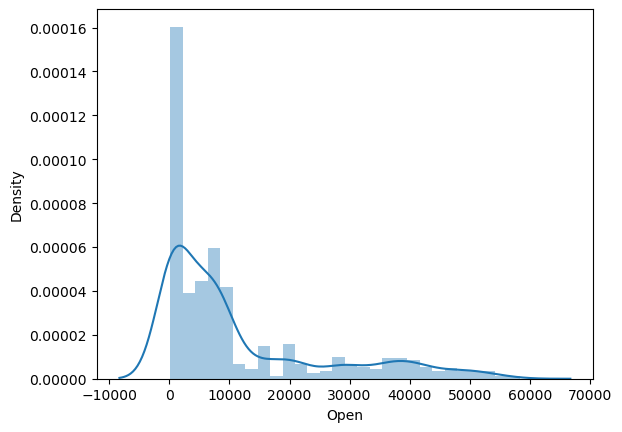

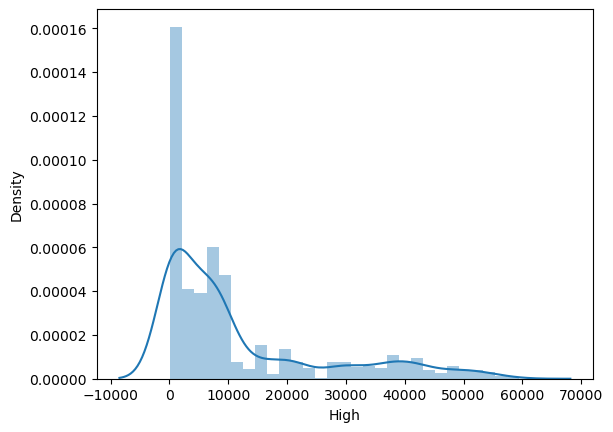

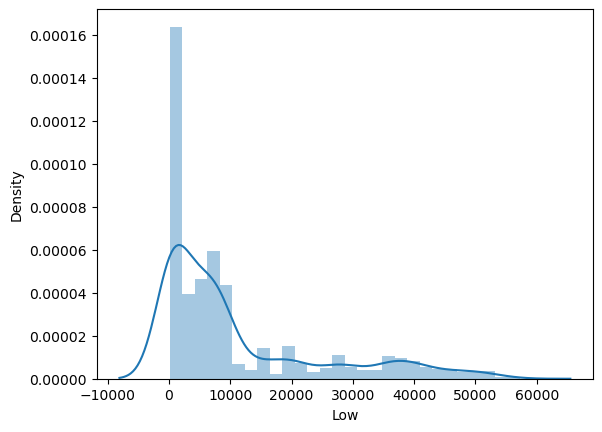

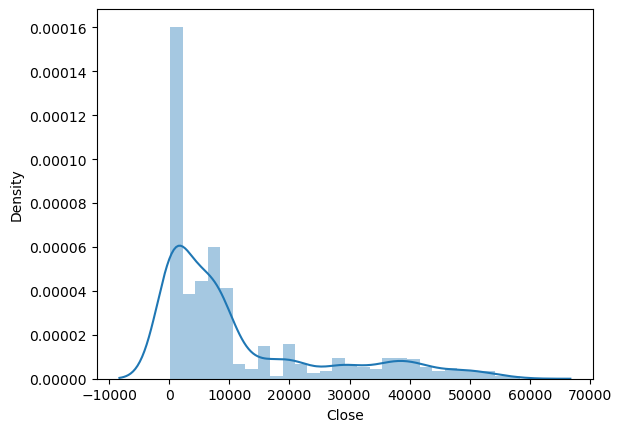

In [25]:

# * Je dois maintenant vérifier la distrubution des autres variables afin de trouver des indices pour la suite
# * Je remarque que toutes mes variables ont une répartition entre 100 et 60000 voir 70000
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

c:\Users\fredd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


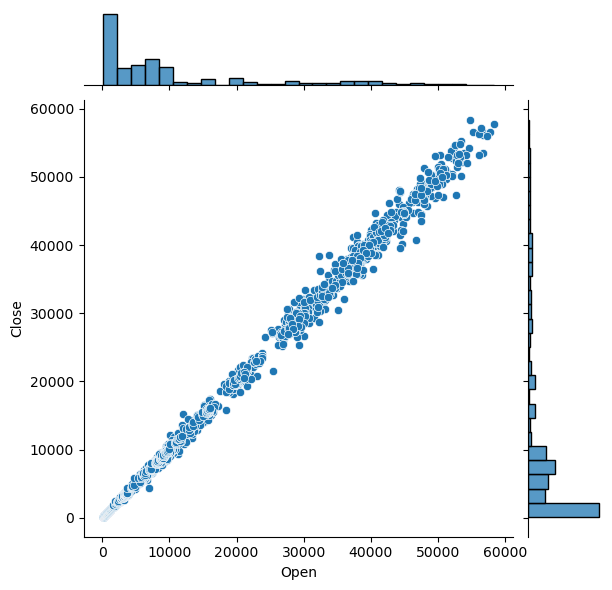

In [26]:
sns.jointplot('Open', 'Close', data=df)

c:\Users\fredd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


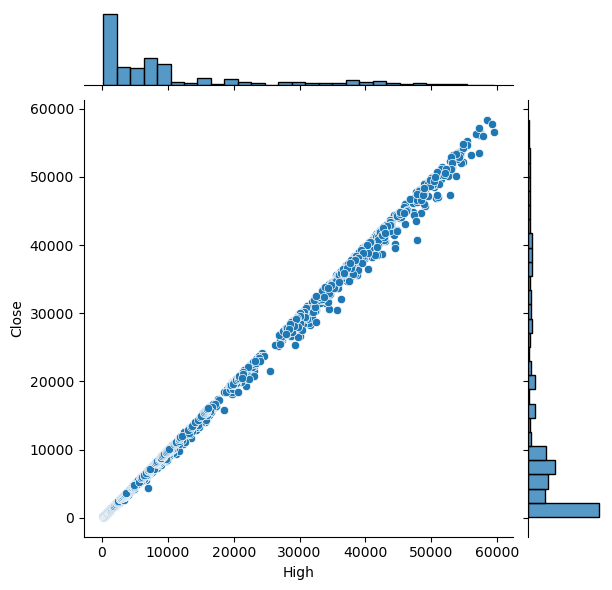

In [27]:
sns.jointplot('High', 'Close', data=df)

c:\Users\fredd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


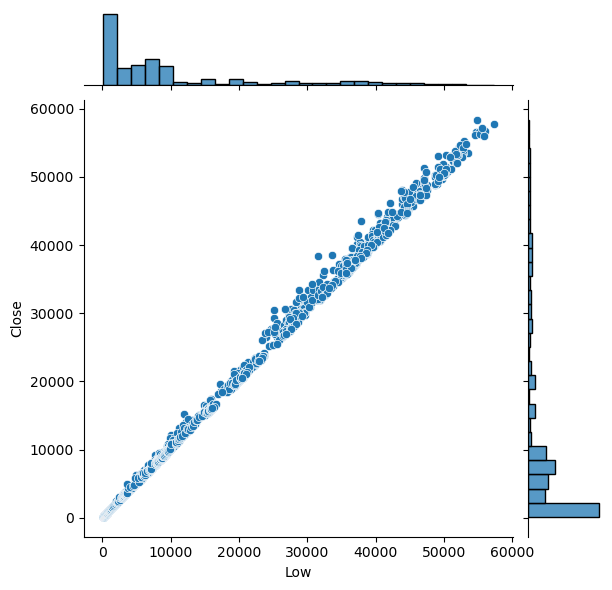

In [28]:
sns.jointplot('Low', 'Close', data=df)


In [29]:
df

,Open,High,Low,Close
Date,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367
2014-09-18,355.588409,355.505402,319.789459,328.539368
2014-09-19,328.278503,330.936707,298.921021,307.761139
2014-09-20,307.665253,329.978180,303.931244,318.758972
2014-09-21,318.120514,321.504517,306.502197,310.632446
...,...,...,...,...
2023-01-04,15817.671875,16002.794922,15783.755859,15899.841797
2023-01-05,15900.061523,15902.215820,15902.749023,16002.543945
2023-01-06,16002.293945,15960.681641,15921.389648,15896.708984


## Identification des outlier

c:\Users\fredd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Close'>

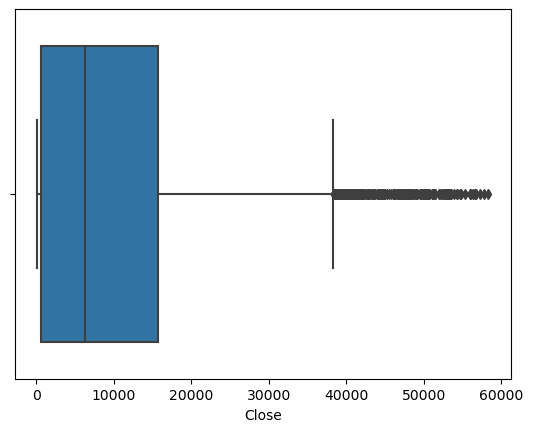

In [30]:

# * On peux considérer que les valeurs allant de 40000 à 60000 sont des outliers mais comme le monde de la bourse et plus particulièrement
# * le bitcoin sont très volatiles, les outiliers d'hiers peuvent devenir la norme d'aujourd'hui. Donc je ne garde pas d'aoutliers.
sns.boxplot('Close', data=df)

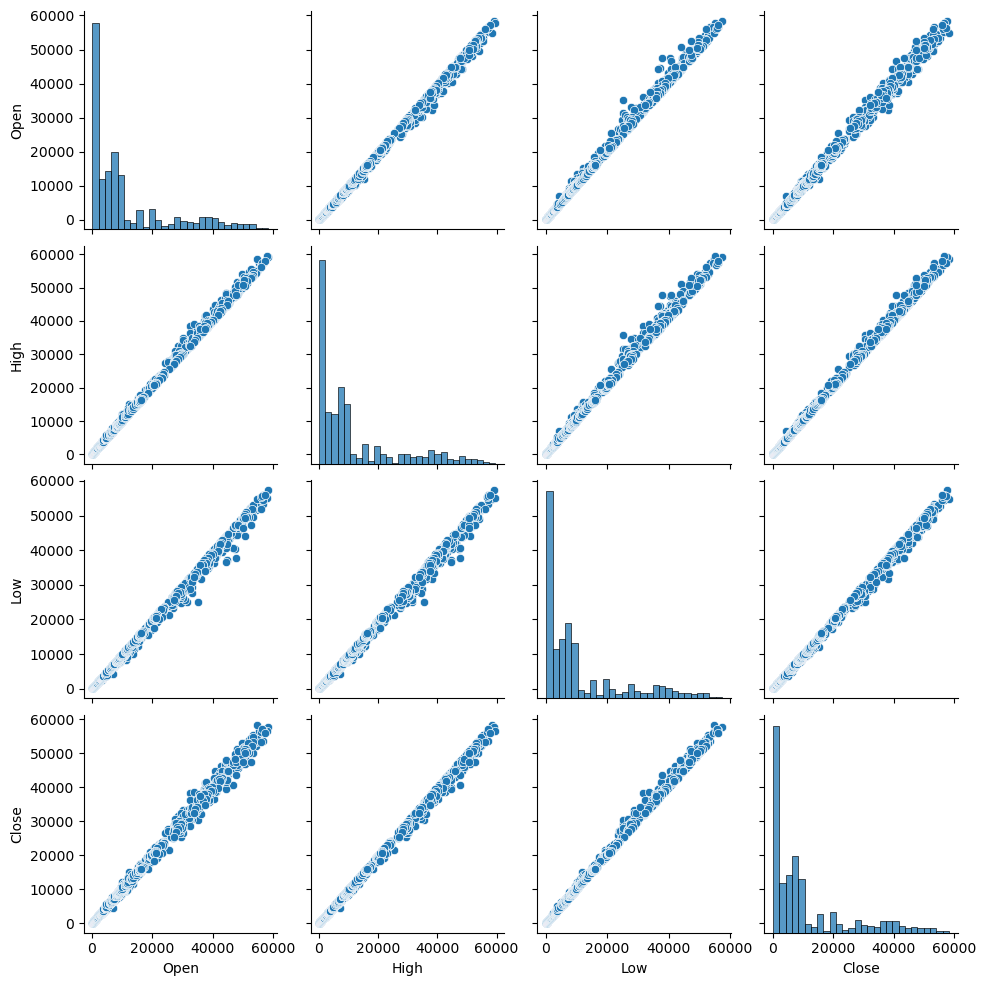

In [31]:
sns.pairplot(df)

## Turtle Strategy

In [32]:

# * Le but de turtle strategy est de déterminer si oui ou non c'est l'occasion de miser son argent
# * selon si le Close du bitcoin sur le jour précédent est inférieur au Close du jour suivant
df1 = data.copy()
df1 = df1.drop(['Volume', 'Adj Close'], axis=1)

In [33]:
len(df1)

3037

In [34]:
df1['Buy'] = np.zeros(len(df1))
df1['Sell'] = np.zeros(len(df1))
df1

,Open,High,Low,Close,Buy,Sell
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,0.0,0.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,0.0,0.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,0.0,0.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,0.0,0.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,0.0,0.0
...,...,...,...,...,...,...
2023-01-05,15900.061523,15902.215820,15902.749023,16002.543945,0.0,0.0
2023-01-06,16002.293945,15960.681641,15921.389648,15896.708984,0.0,0.0
2023-01-07,15896.847656,15945.719727,15861.756836,15900.098633,0.0,0.0


<AxesSubplot: xlabel='Date'>

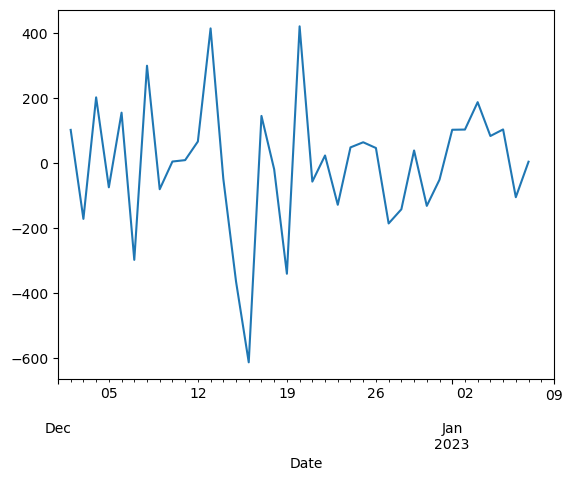

In [35]:

# * Cependant ont peux constater sur ce graph que le cours est extrêment volatil
# * et qu'il ne faut surtout pas se baser là dessus pour faire ses prédictions.
df1['Close']['2022-12': '2023-01'].diff().plot()

<AxesSubplot: xlabel='Date'>

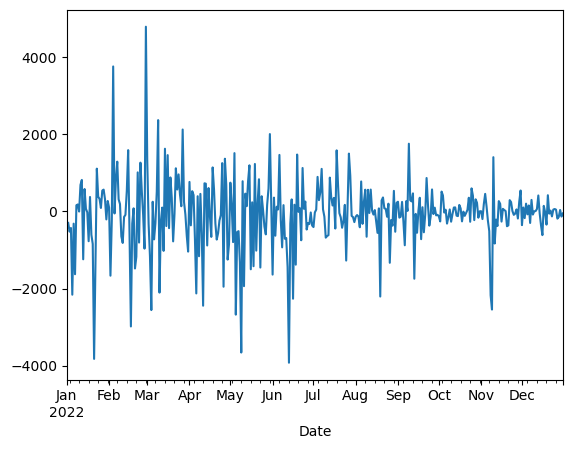

In [36]:

# * Un exemple pour une année 
df1['Close']['2022'].diff().plot()

In [37]:

# * Remplissage de Buy et de Sell
df1['RollingMax'] = df1['Close'].shift(1).rolling(window=5).max()
df1['RollingMin'] = df1['Close'].shift(1).rolling(window=5).min()
df1.loc[df1['RollingMax'] < df1['Close'], 'Buy'] = 1
df1.loc[df1['RollingMin'] > df1['Close'], 'Sell'] = -1

In [38]:

# * Voici le résultat pour 1 mois
df1[(df1.index > '2022-12-01')]

,Open,High,Low,Close,Buy,Sell,RollingMax,RollingMin
Date,,,,,,,,
2022-12-02,16118.433594,16218.266602,16131.018555,16218.266602,0.0,0.0,16471.539063,15678.680664
2022-12-03,16219.631836,16244.251953,16026.710938,16045.781250,0.0,0.0,16471.539063,15678.680664
2022-12-04,16045.718750,16281.863281,16041.229492,16247.135742,0.0,0.0,16471.539063,15928.907227
2022-12-05,16245.625977,16424.753906,16136.502930,16171.797852,0.0,0.0,16471.539063,16045.781250
2022-12-06,16172.191406,16330.746094,16182.046875,16326.098633,1.0,0.0,16247.135742,16045.781250
2022-12-07,16326.100586,16359.901367,16019.413086,16027.472656,0.0,-1.0,16326.098633,16045.781250
2022-12-08,16026.732422,16356.066406,15977.717773,16326.217773,1.0,0.0,16326.098633,16027.472656
2022-12-09,16324.961914,16367.995117,16236.149414,16244.917969,0.0,0.0,16326.217773,16027.472656
2022-12-10,16245.931641,16332.431641,16241.229492,16248.855469,0.0,0.0,16326.217773,16027.472656


<AxesSubplot: xlabel='Date'>

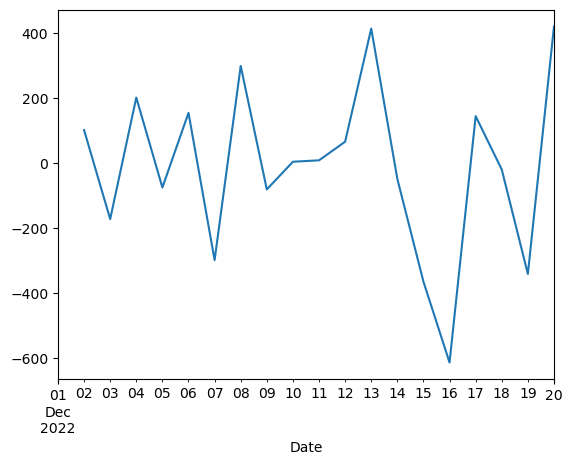

In [39]:

# * On peux constater ici, si on prend l'exemple du 10 décenbre 2022
# * On constate que l'algorithme ne nous conseil pas d'acheter
# * Alors que si on prend le 13, l'algorithme nous conseil d'acheter pour tout de suite tout perdre

df1['Close']['2022-12-01':'2022-12-20'].diff().plot()

<AxesSubplot: xlabel='Date'>

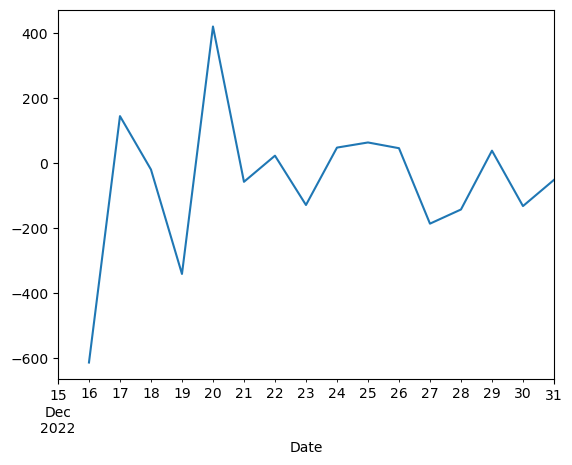

In [40]:
df1['Close']['2022-12-15':'2022-12-31'].diff().plot()

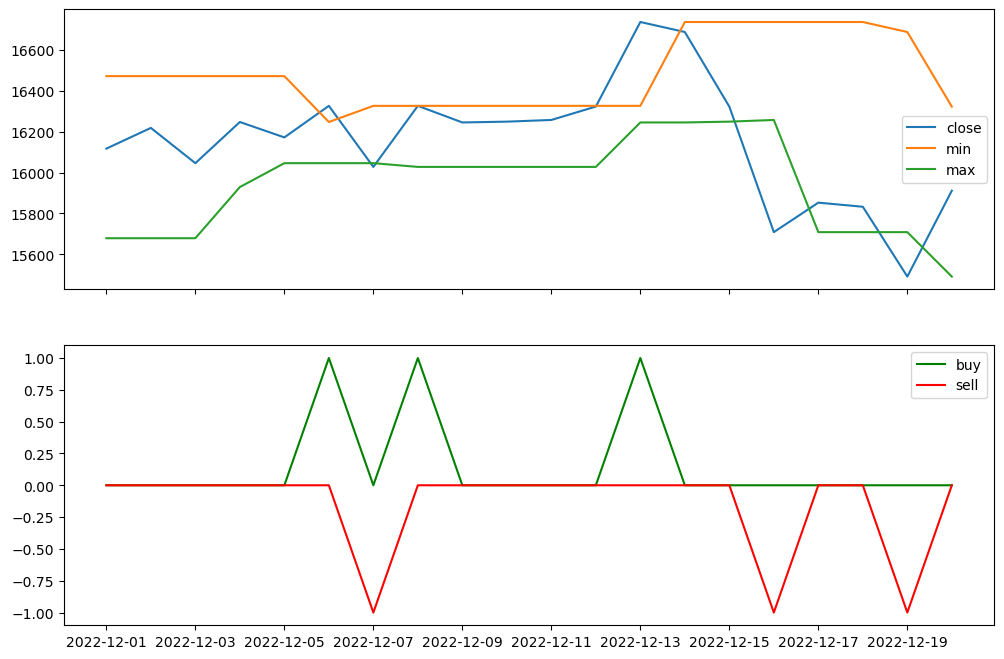

In [41]:

# * Visualisation du résultat
# * On peux observer le même dénomène pour le 10 et le 13 décembre
start = '2022-12-01'
end = '2022-12-20'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12 8))
#plt.subplot(211)
ax[0].plot(df1['Close'][start:end])
ax[0].plot(df1['RollingMax'][start:end])
ax[0].plot(df1['RollingMin'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(df1['Buy'][start:end], c='g')
ax[1].plot(df1['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])

## Turtle Strategy V2

In [42]:
sample = data.copy()
sample['price'] = (data['High'] + data['Low'])/2
sample

,Open,High,Low,Close,Adj Close,Volume,price
Date,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,1.638917e+07,356.527695
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,2.669185e+07,337.647431
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,2.956010e+07,314.928864
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,2.873683e+07,316.954712
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,2.070262e+07,314.003357
...,...,...,...,...,...,...,...
2023-01-05,15900.061523,15902.215820,15902.749023,16002.543945,16002.543945,1.301434e+10,15902.482422
2023-01-06,16002.293945,15960.681641,15921.389648,15896.708984,15896.708984,1.351641e+10,15941.035644
2023-01-07,15896.847656,15945.719727,15861.756836,15900.098633,15900.098633,7.234739e+09,15903.738282


In [43]:

# * 1) Création d'un dataframe contenant seulement le prix et la date en tant qu'index
df2 = sample[['price']]

# 2) Création d'une colonne pour les rendements logarithmiques
# ! J'ai pas compris .shift()
# ! J'ai pas compris ce qui se passe ici réellement
df2['log_returns'] = np.log(df2['price'] / df2['price'].shift(1))
df2

C:\Users\fredd\AppData\Local\Temp\ipykernel_11656\3368523145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_returns'] = np.log(df2['price'] / df2['price'].shift(1))


,price,log_returns
Date,,
2014-09-17,356.527695,NaN
2014-09-18,337.647431,-0.054410
2014-09-19,314.928864,-0.069655
2014-09-20,316.954712,0.006412
2014-09-21,314.003357,-0.009355
...,...,...
2023-01-05,15902.482422,0.000579
2023-01-06,15941.035644,0.002421
2023-01-07,15903.738282,-0.002342


In [44]:

# * 3) Création d'une colonne qui indique la position de l'action, 0 si elle baisse et 1 si elle monte
# * Si les rendements logarithmiques sont positifs, cela signifie qu'elle a augmenté ce jour-là
# * Cette colonne peut être utilisée pour entraîner un  modèle d'apprentissage profond dans le futur
# TODO Ce code fait le taf. Pourquoi ?
df2['position'] = np.where(df2['log_returns'] > 0, 1, 0) 
df2

C:\Users\fredd\AppData\Local\Temp\ipykernel_11656\423976721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['position'] = np.where(df2['log_returns'] > 0, 1, 0)


,price,log_returns,position
Date,,,
2014-09-17,356.527695,NaN,0
2014-09-18,337.647431,-0.054410,0
2014-09-19,314.928864,-0.069655,0
2014-09-20,316.954712,0.006412,1
2014-09-21,314.003357,-0.009355,0
...,...,...,...
2023-01-05,15902.482422,0.000579,1
2023-01-06,15941.035644,0.002421,1
2023-01-07,15903.738282,-0.002342,0


<AxesSubplot: xlabel='Date'>

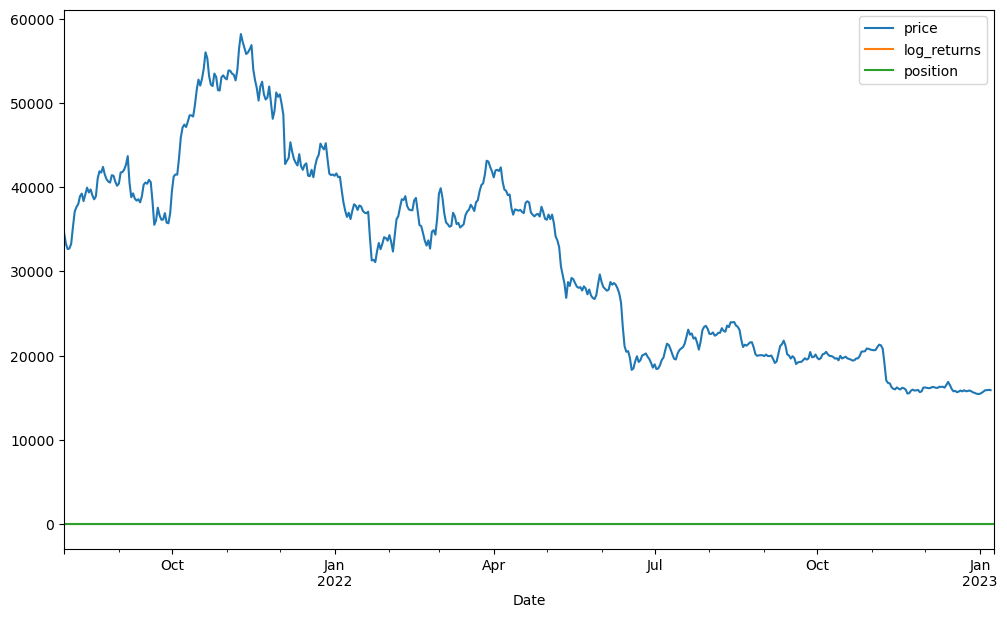

In [51]:

# * Mes données de test
test_data = df2[df2.index >= '2021-08-01'].copy()
test_data.plot(figsize=(12, 7))

Date
2021-12-31    [AxesSubplot(0.125,0.653529;0.775x0.226471), A...
2022-12-31    [AxesSubplot(0.125,0.653529;0.775x0.226471), A...
2023-12-31    [AxesSubplot(0.125,0.653529;0.775x0.226471), A...
Freq: A-DEC, dtype: object

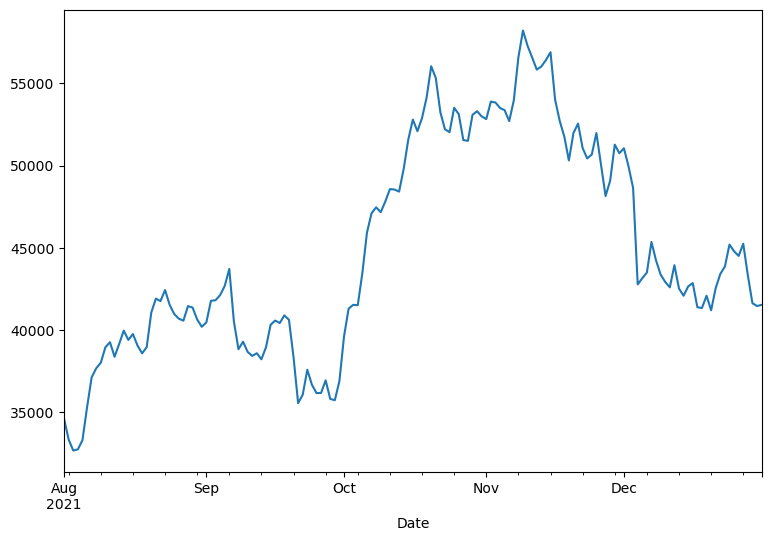

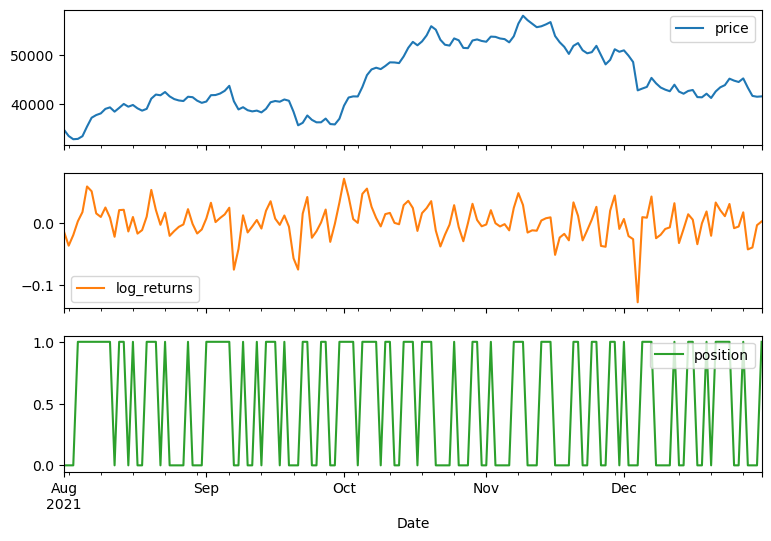

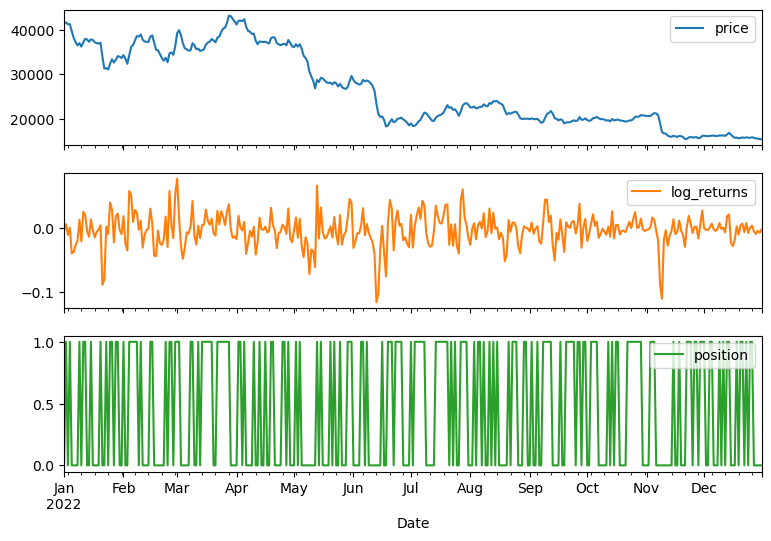

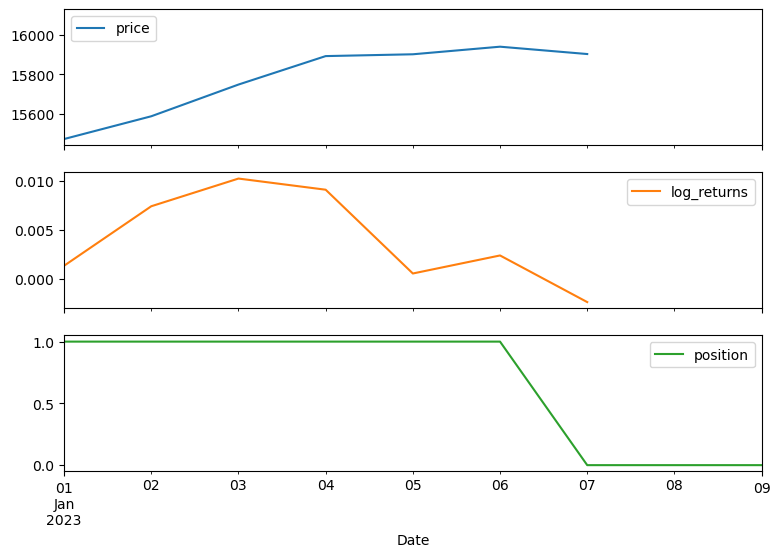

In [56]:
test_data[['price', 'log_returns', 'position']].resample('Y').plot(subplots=True, figsize=(9,6))

<AxesSubplot: xlabel='Date'>

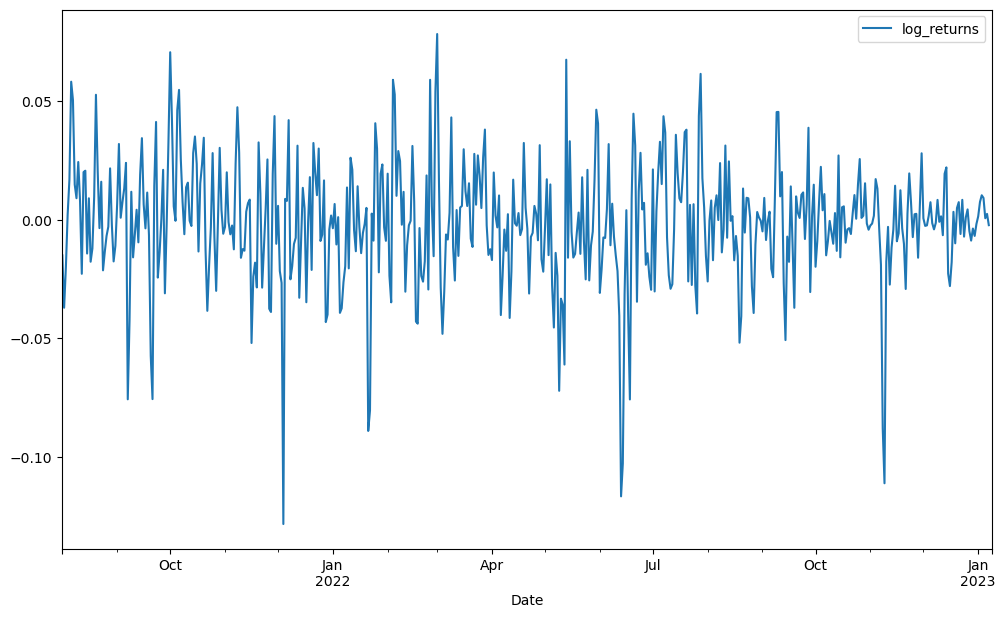

In [52]:
test_data[['log_returns']].plot(figsize=(12, 7))

In [86]:
test_data[['log_returns']]

,log_returns
Date,
2021-08-01,-0.015094
2021-08-02,-0.037191
2021-08-03,-0.020081
2021-08-04,0.002112
2021-08-05,0.016907
...,...
2023-01-05,0.000579
2023-01-06,0.002421
2023-01-07,-0.002342


<AxesSubplot: xlabel='Date'>

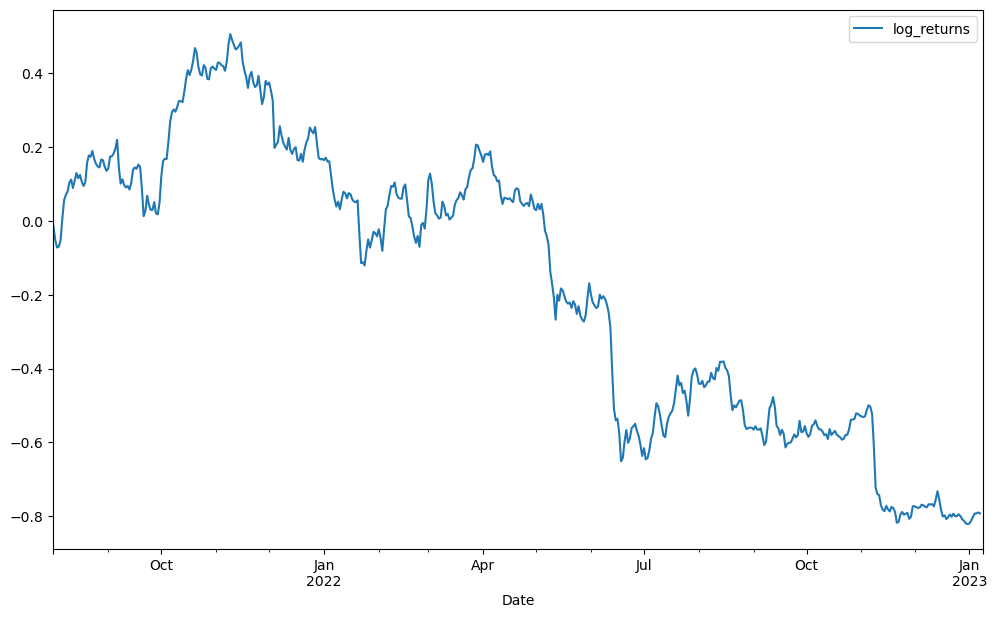

In [50]:

# TODO Le retour de log_returns est plutôt intéressant. A creuser.
# * cumsum() : additionner les valeurs d'une ligne
# * Ce qui veux donc dire que la somme cummulée de toutes mes valeurs log_returns 
# * me retourne le même graphique que price
test_data[['log_returns']].cumsum().plot(figsize=(12, 7))

<AxesSubplot: xlabel='Date'>

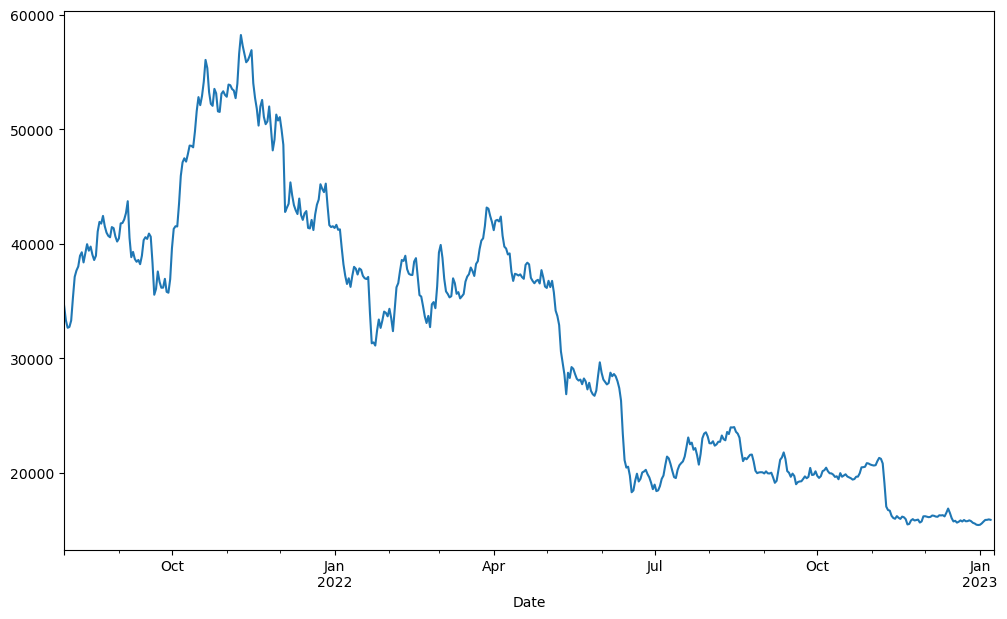

In [67]:
test_data['price'].plot(figsize=(12, 7))

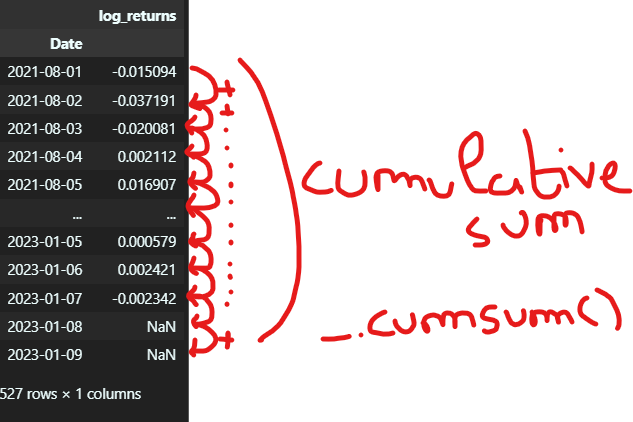

# Pre-Processing

In [ ]:
df_pre = data.copy()
df_pre_head()